In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common.scatter_plotter import ScatterPlotter
from common.heatmap import heatmap_values
from common.basic_analysis import density_plot

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [3]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)

### Charts

Basic data analysis

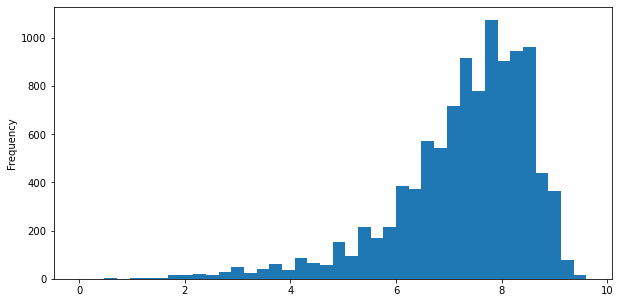

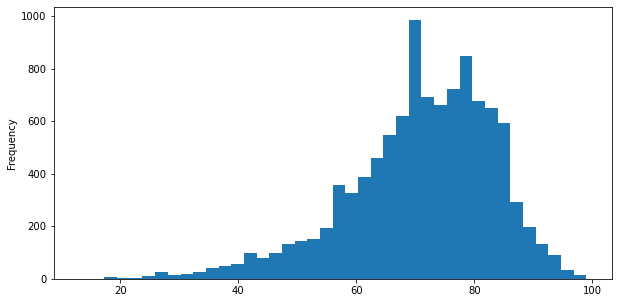

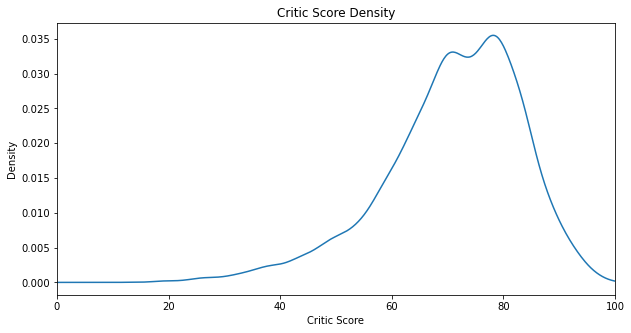

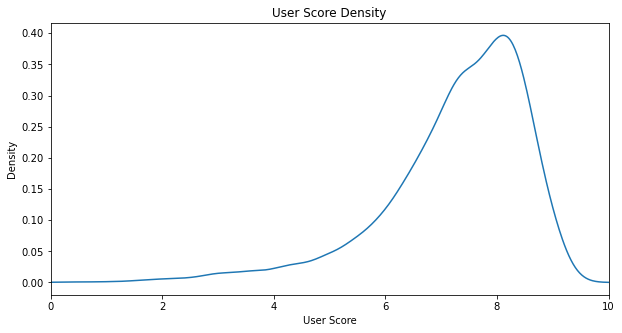

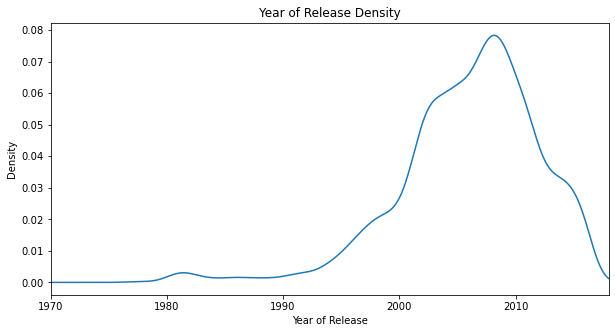

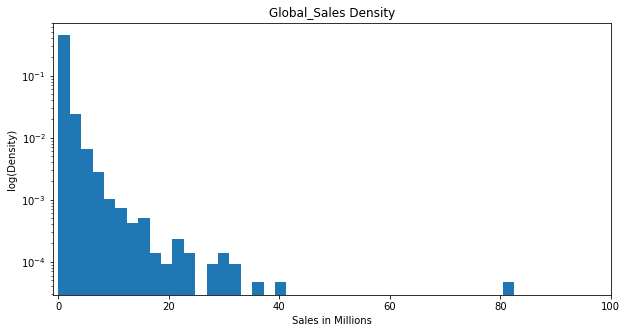

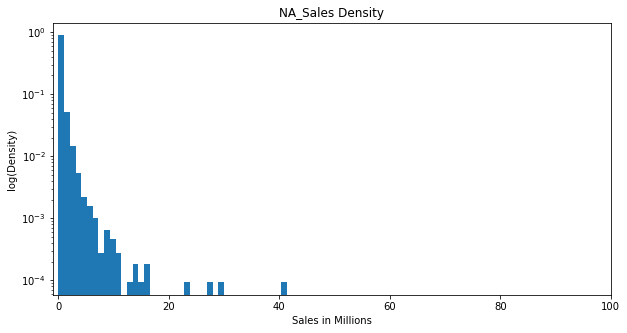

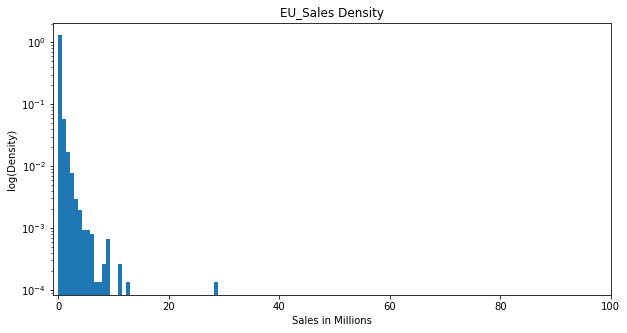

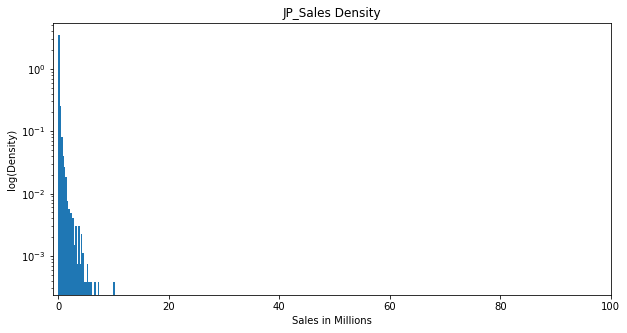

In [4]:
def density_plot(dataframe, x_lim=None, title=None, x_label=None, y_label=None):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.subplot()
    dataframe.plot(kind="density", title=title)
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    if x_lim:
        ax.set_xlim(*x_lim)

def density_histogram_plot(dataframe, x_lim=None, logy=False, title=None, x_label=None, y_label=None):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.subplot()
    dataframe.plot(kind="hist", bins=40, density=True, logy=logy, title=title)
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    if x_lim:
        ax.set_xlim(*x_lim)

def histogram_plot(dataframe, x_lim=None, title=None, x_label=None, y_label=None):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.subplot()
    dataframe.plot(kind="hist", bins=40, title=title)
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    if x_lim:
        ax.set_xlim(*x_lim)

histogram_plot(data["User_Score"])
histogram_plot(data["Critic_Score"])
density_plot(data["Critic_Score"], x_lim=(0, 100), title="Critic Score Density", x_label="Critic Score", y_label="Density")
density_plot(data["User_Score"], x_lim=(0, 10), title="User Score Density", x_label="User Score", y_label="Density")
density_plot(data["Year_of_Release"], x_lim=(1970, 2018), title="Year of Release Density", x_label="Year of Release", y_label="Density")
density_histogram_plot(data["Global_Sales"], x_lim=(-1, 100), logy=True, title="Global_Sales Density", x_label="Sales in Millions", y_label="log(Density)")
density_histogram_plot(data["NA_Sales"], x_lim=(-1, 100), logy=True, title="NA_Sales Density", x_label="Sales in Millions", y_label="log(Density)")
density_histogram_plot(data["EU_Sales"], x_lim=(-1, 100), logy=True, title="EU_Sales Density", x_label="Sales in Millions", y_label="log(Density)")
density_histogram_plot(data["JP_Sales"], x_lim=(-1, 100), logy=True, title="JP_Sales Density", x_label="Sales in Millions", y_label="log(Density)")


Stats grouped by year of release

<AxesSubplot:xlabel='Year_of_Release'>

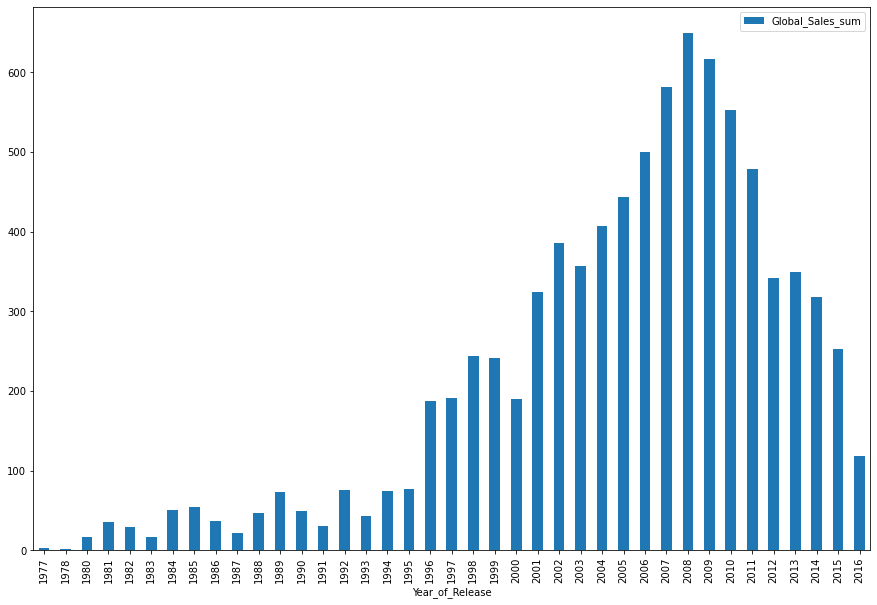

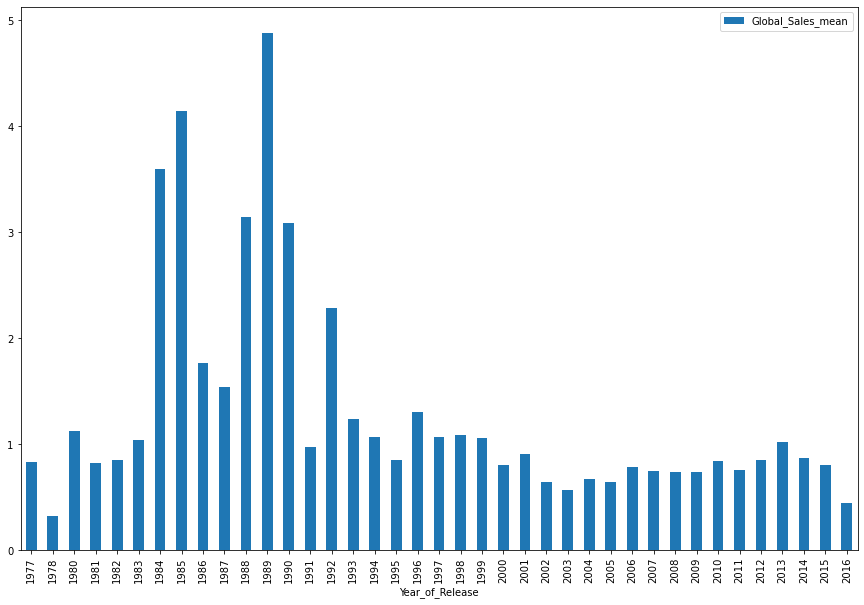

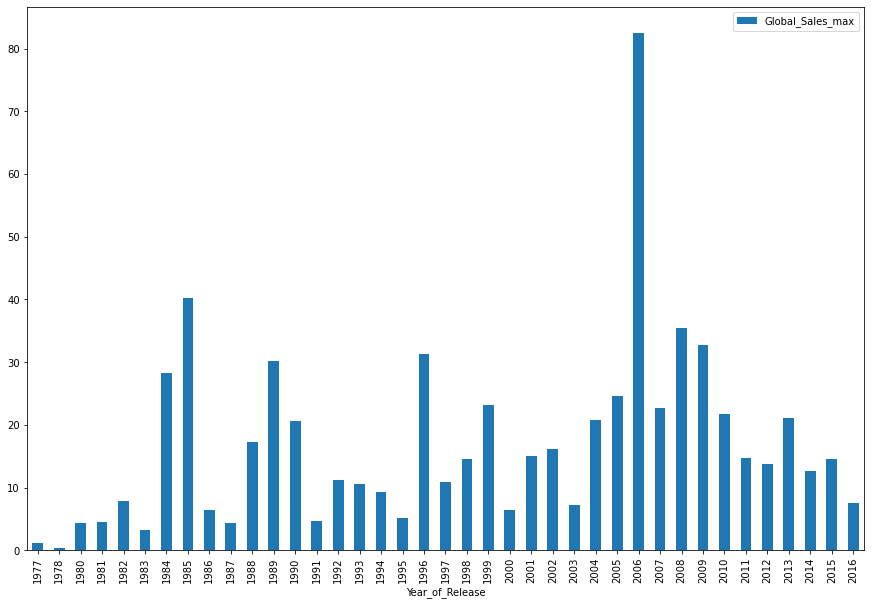

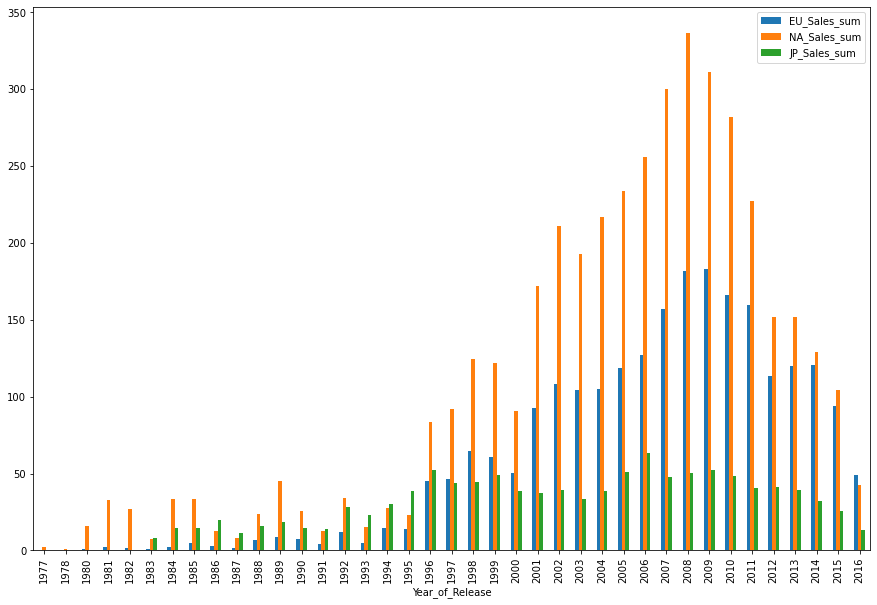

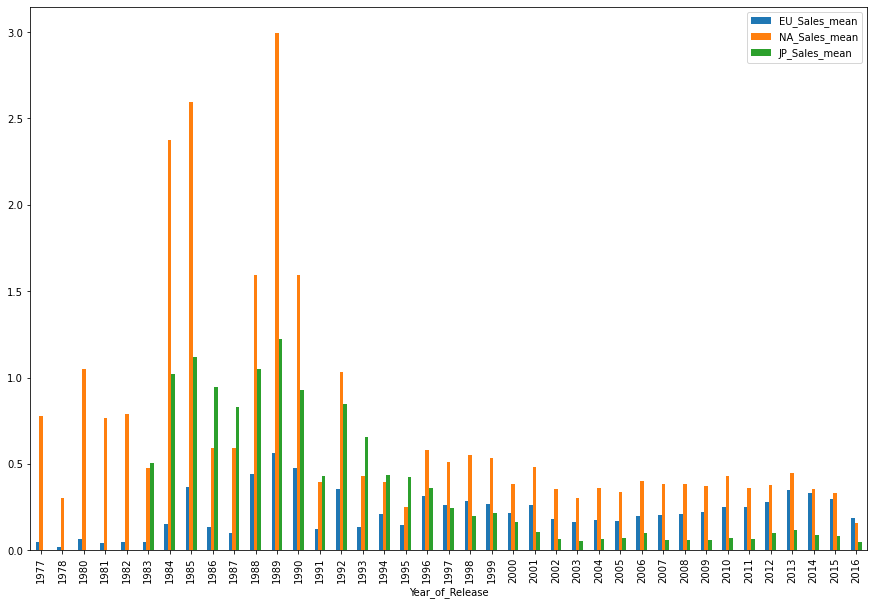

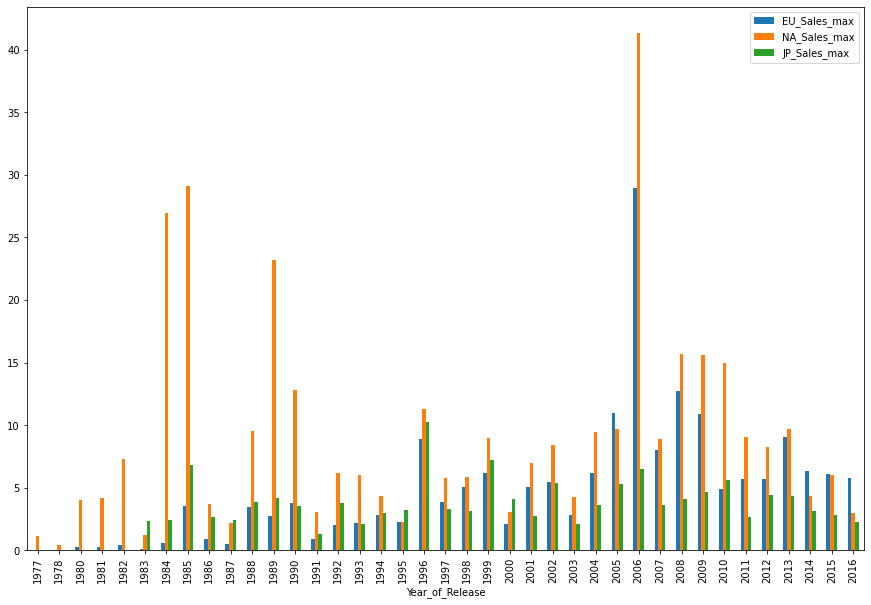

In [5]:

number_of_entries_by_years = data\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales"])\
    .groupby("Year_of_Release").agg(["mean", "sum", "max"])
number_of_entries_by_years.columns = ['_'.join(col).strip()
                                      for col in number_of_entries_by_years.columns.values]

number_of_entries_by_years.plot.bar(y="Global_Sales_sum", figsize=(15,10))
number_of_entries_by_years.plot.bar(y="Global_Sales_mean", figsize=(15,10))
number_of_entries_by_years.plot.bar(y="Global_Sales_max", figsize=(15,10))

number_of_entries_by_years.plot.bar(y=["EU_Sales_sum", "NA_Sales_sum", "JP_Sales_sum"], figsize=(15,10))
number_of_entries_by_years.plot.bar(y=["EU_Sales_mean", "NA_Sales_mean", "JP_Sales_mean"], figsize=(15,10))
number_of_entries_by_years.plot.bar(y=["EU_Sales_max", "NA_Sales_max", "JP_Sales_max"], figsize=(15,10))

Stats grouped by genre

<AxesSubplot:xlabel='Genre'>

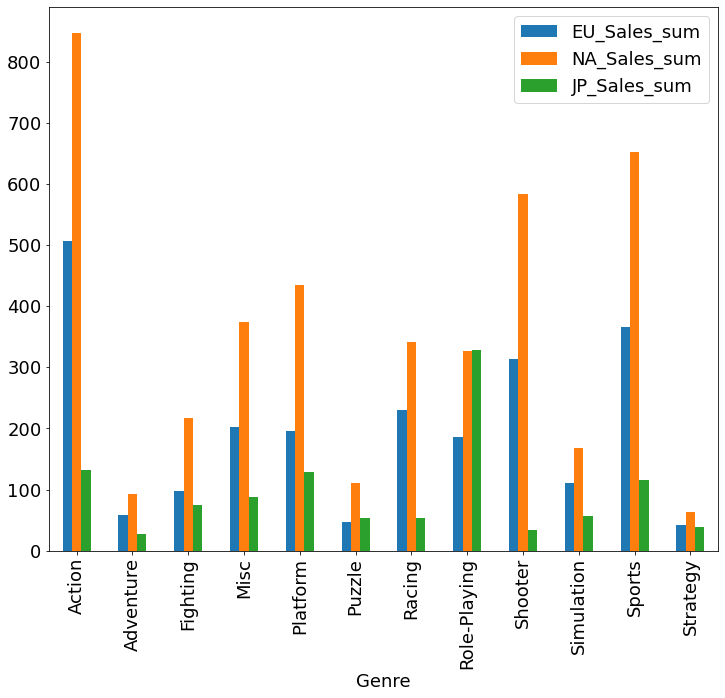

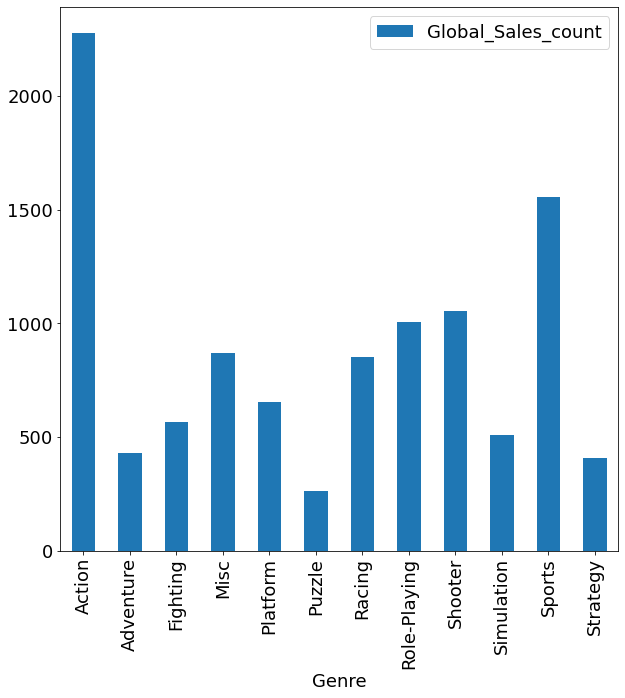

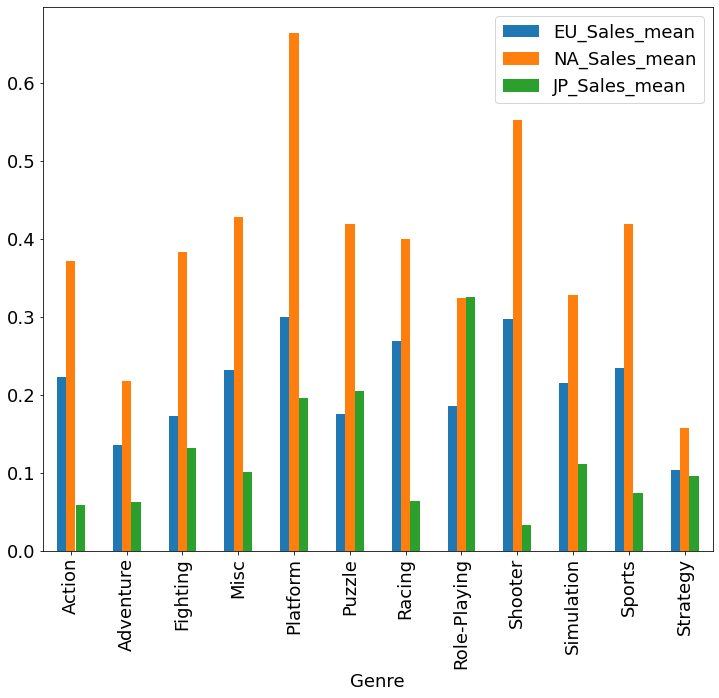

In [15]:
plt.rcParams.update({'font.size': 18})
stats_by_genre = data\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales", "Genre"])\
    .groupby("Genre").agg(["mean", "count", "sum"])
stats_by_genre.columns = ['_'.join(col).strip()
                          for col in stats_by_genre.columns.values]

stats_by_genre.plot.bar(y=["EU_Sales_sum", "NA_Sales_sum", "JP_Sales_sum"], figsize=(12,10))
stats_by_genre.plot.bar(y="Global_Sales_count", figsize=(10,10))
stats_by_genre.plot.bar(y=["EU_Sales_mean", "NA_Sales_mean", "JP_Sales_mean"], figsize=(12,10))

Stats grouped by platform

<AxesSubplot:xlabel='Platform'>

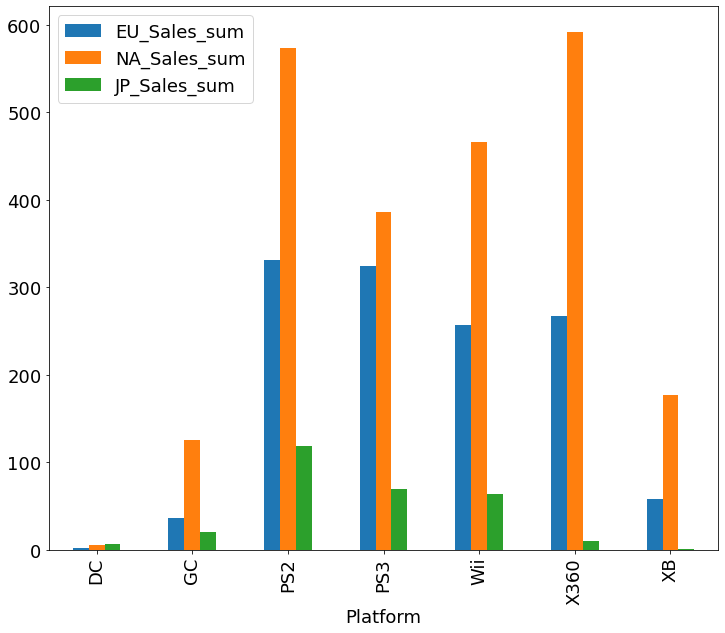

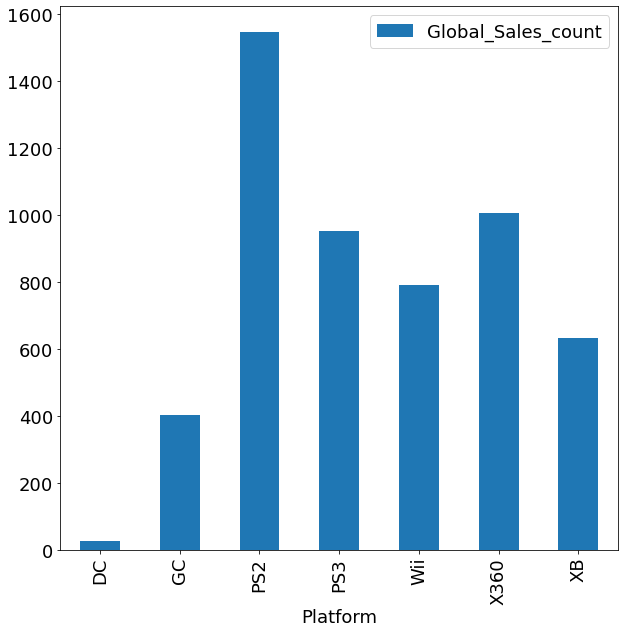

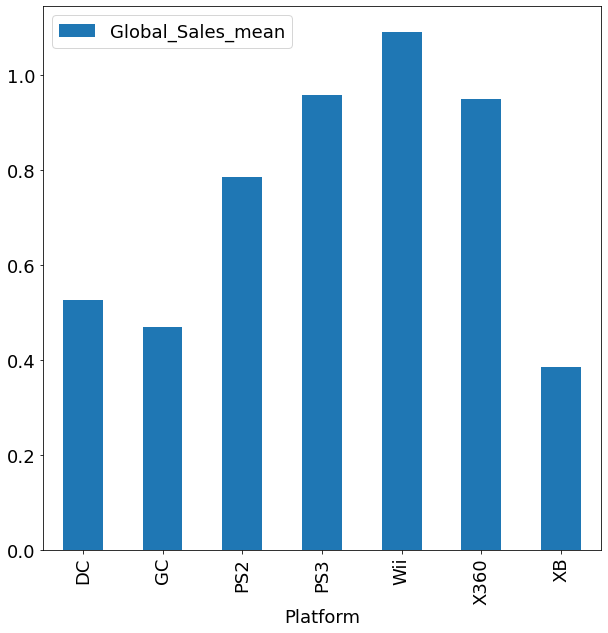

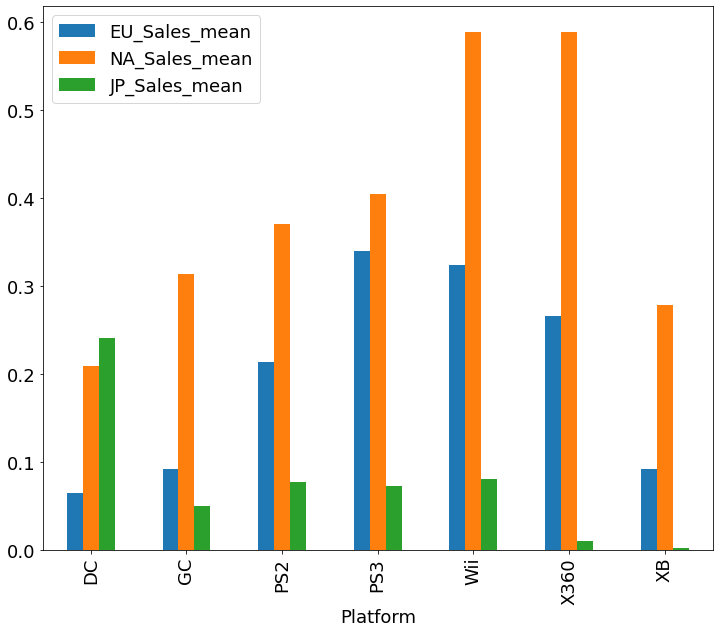

In [16]:
sixth_gen = ["PS2", "XB", "DC", "GC"]
seventh_gen = ["PS3", "Wii", "X360"]
chosen = seventh_gen.extend(sixth_gen)

stats_by_platform = data.loc[data["Platform"].isin(seventh_gen)]\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales", "Platform"])\
    .groupby("Platform").agg(["mean", "count", "sum"])
stats_by_platform.columns = ['_'.join(col).strip()
                          for col in stats_by_platform.columns.values]

stats_by_platform.plot.bar(y=["EU_Sales_sum", "NA_Sales_sum", "JP_Sales_sum"], figsize=(12,10))
stats_by_platform.plot.bar(y="Global_Sales_count", figsize=(10,10))
stats_by_platform.plot.bar(y=["Global_Sales_mean"], figsize=(10,10))
stats_by_platform.plot.bar(y=["EU_Sales_mean", "NA_Sales_mean", "JP_Sales_mean"], figsize=(12,10))

Critic Score vs User Score

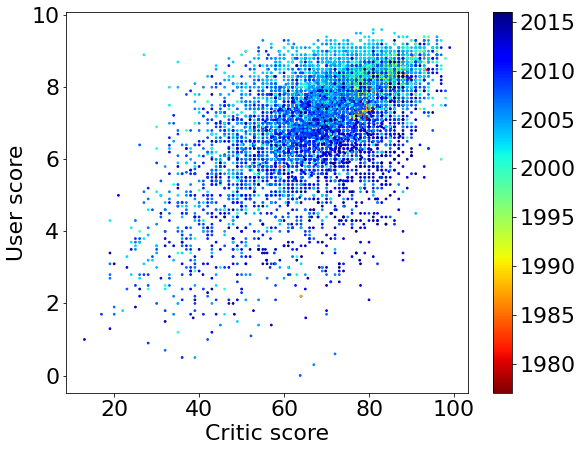

In [8]:
category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.User_Score, data[category_column])\
    .with_labels('Critic score', 'User score')\
    .with_color_bar()\
    .plot()

Sales per region considering Critic Score

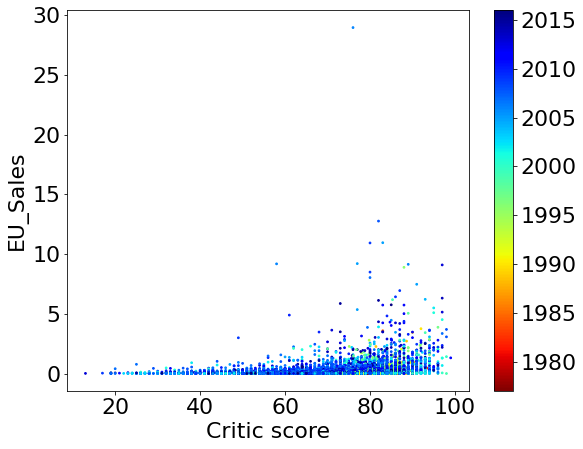

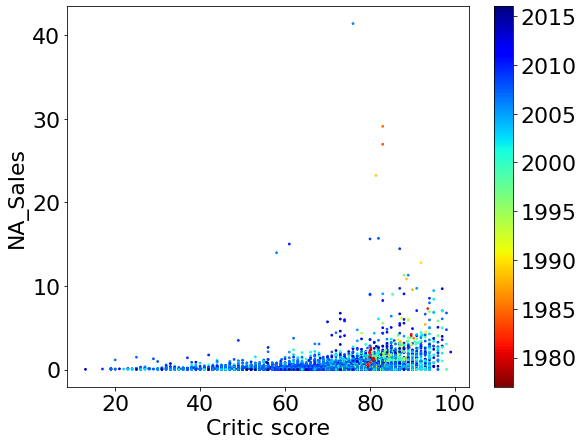

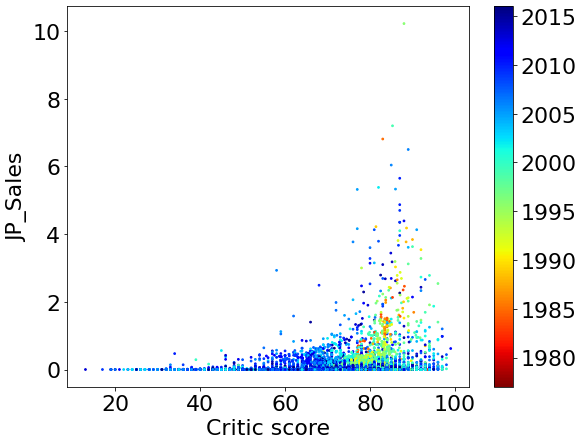

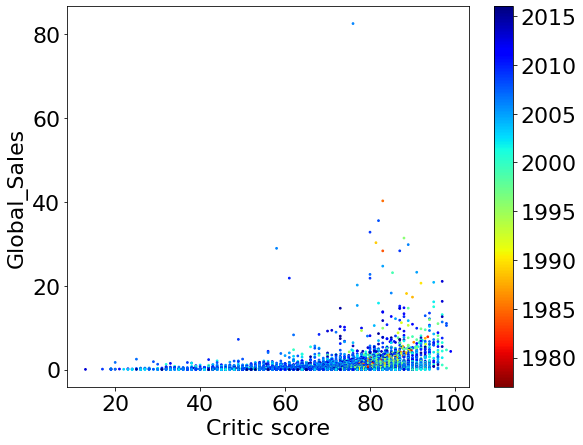

In [9]:
category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.EU_Sales, data[category_column])\
    .with_labels('Critic score', 'EU_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.NA_Sales, data[category_column])\
    .with_labels('Critic score', 'NA_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.JP_Sales, data[category_column])\
    .with_labels('Critic score', 'JP_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.Global_Sales, data[category_column])\
    .with_labels('Critic score', 'Global_Sales')\
    .with_color_bar()\
    .plot()

Sales per region considering User Score

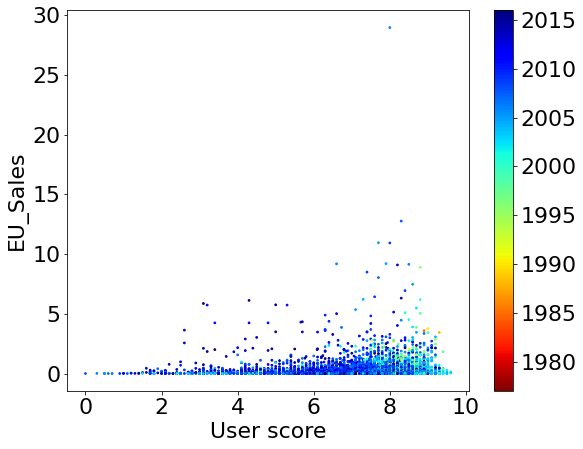

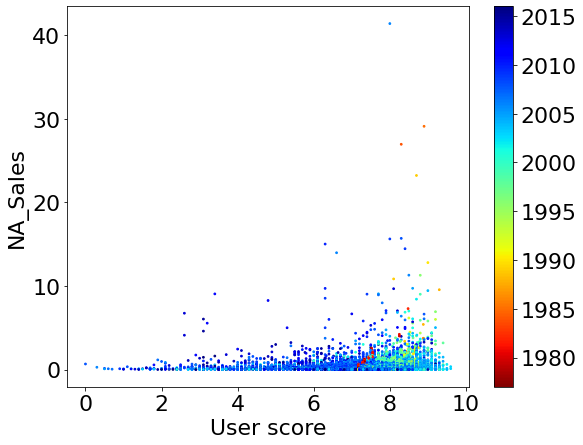

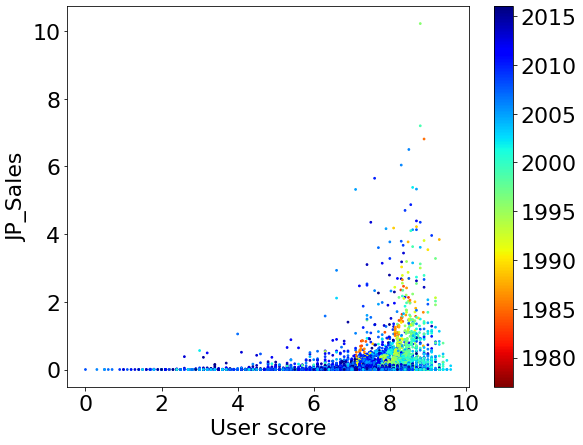

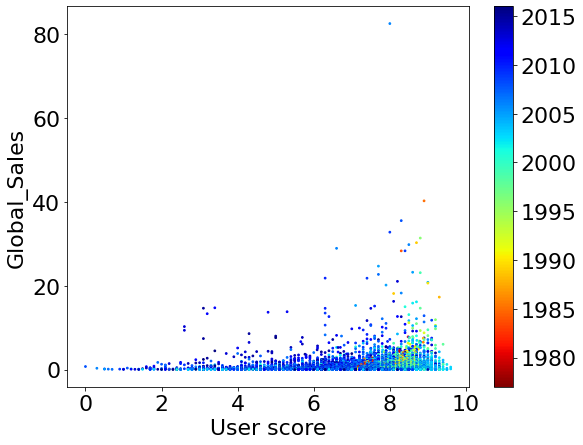

In [10]:
category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.EU_Sales, data[category_column])\
    .with_labels('User score', 'EU_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.NA_Sales, data[category_column])\
    .with_labels('User score', 'NA_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.JP_Sales, data[category_column])\
    .with_labels('User score', 'JP_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.Global_Sales, data[category_column])\
    .with_labels('User score', 'Global_Sales')\
    .with_color_bar()\
    .plot()


Correlation matrix between numerical values in the dataset

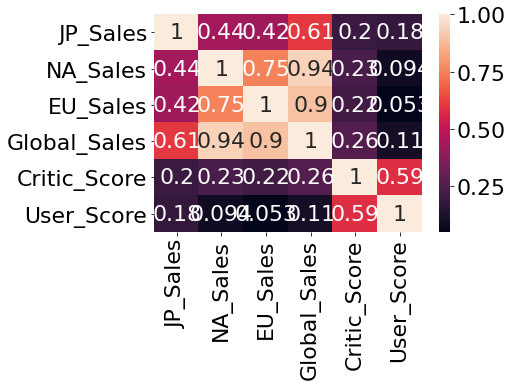

In [11]:
sns.heatmap(data[["JP_Sales", "NA_Sales", "EU_Sales", "Global_Sales", "Critic_Score", "User_Score"]].corr(), annot=True)
plt.show()

Heatmap x - Genre, y - Platform, heat - sales

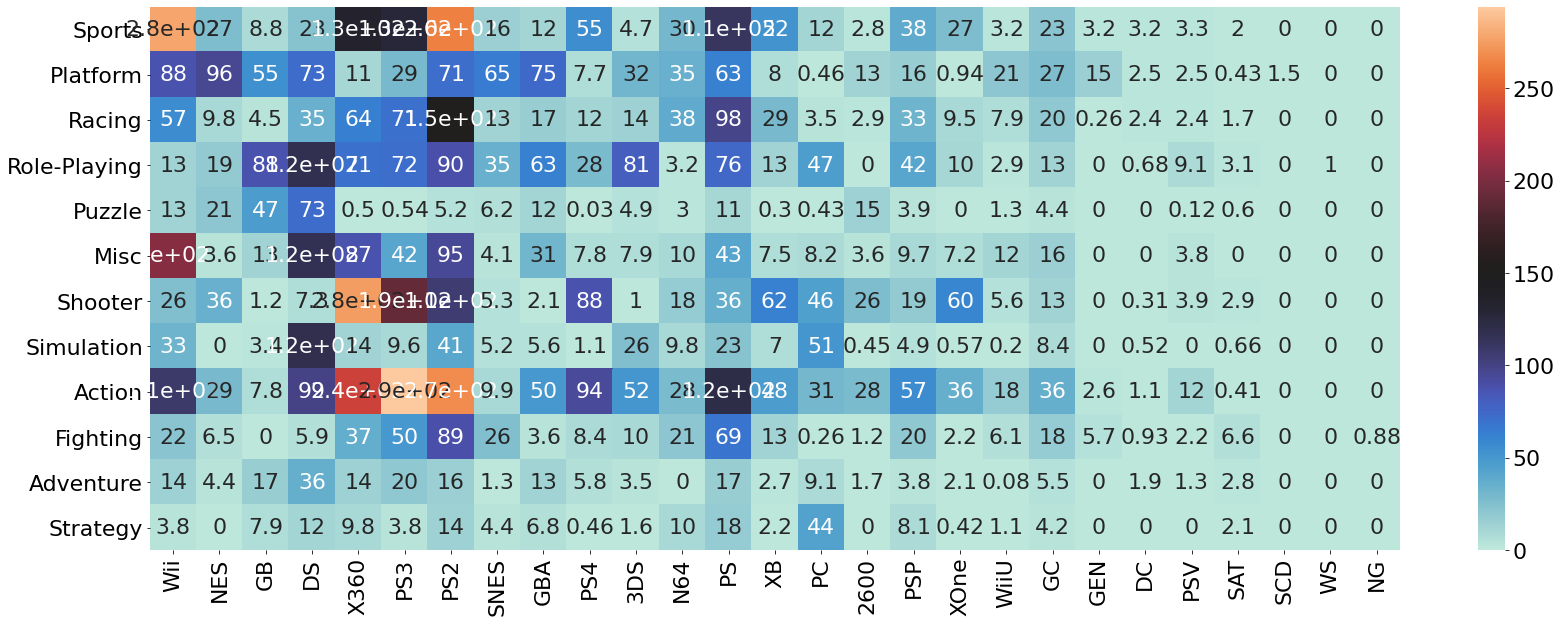

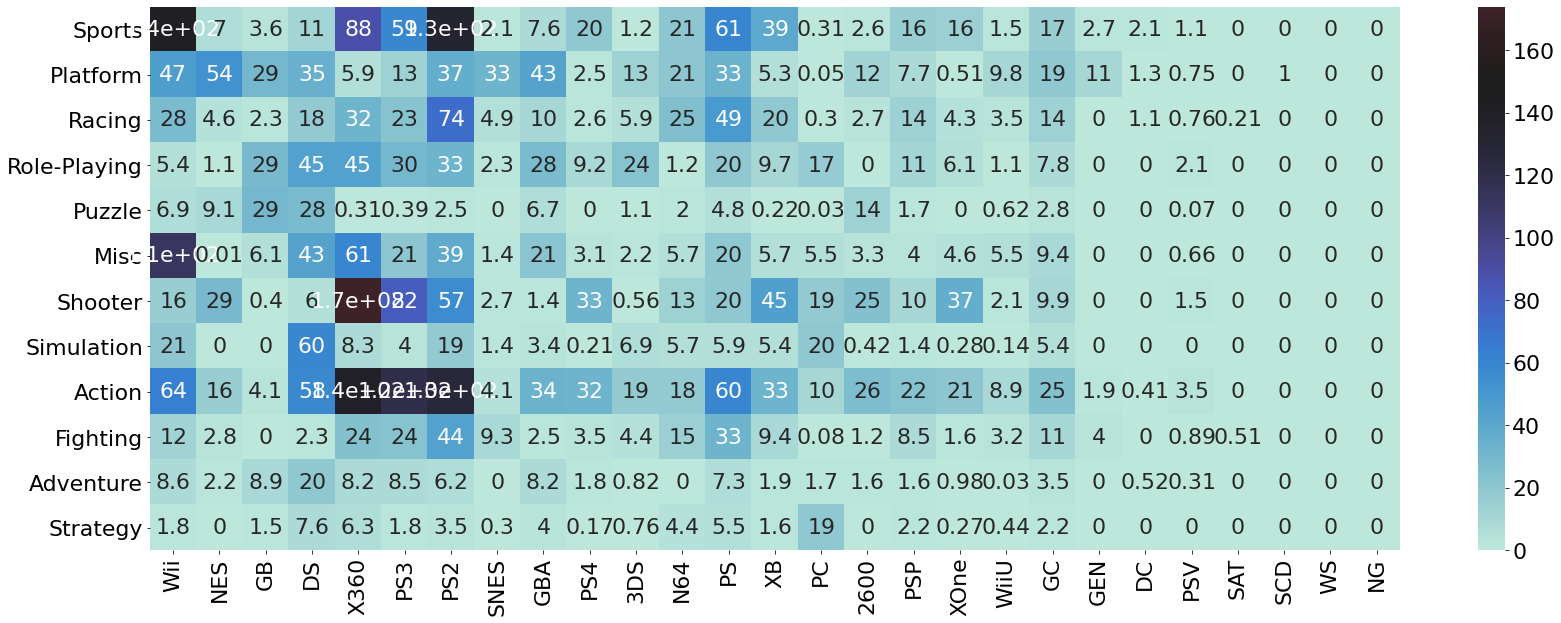

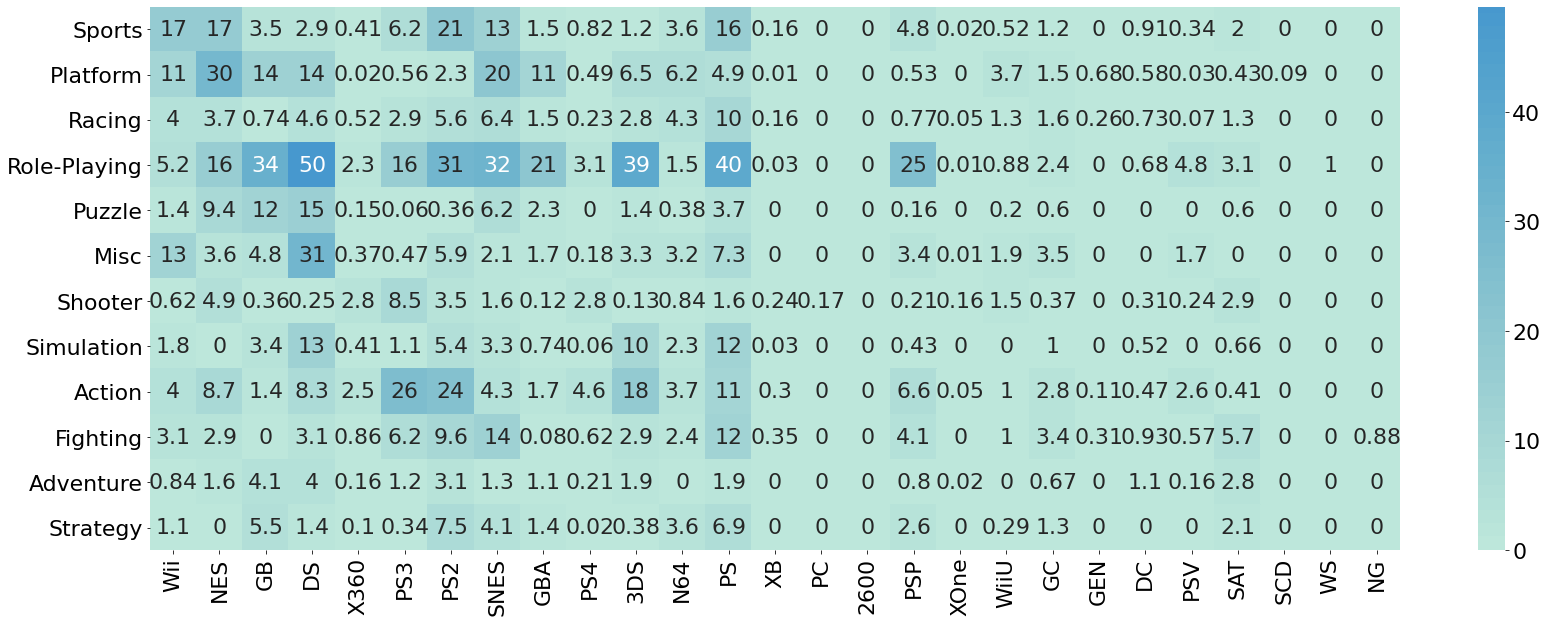

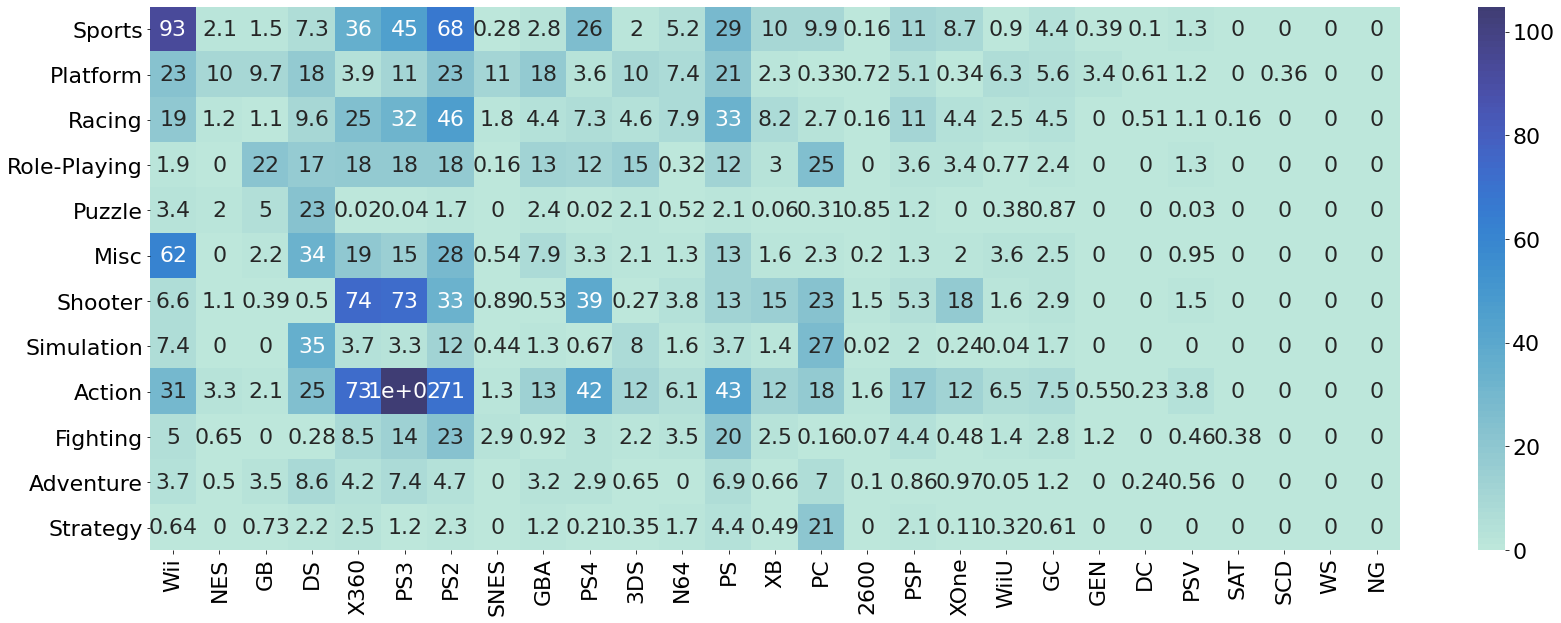

In [12]:
plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "Global_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "NA_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "JP_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "EU_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()